<a href="https://colab.research.google.com/github/ranjitsm/House-price-prediction-/blob/main/notebook9d2115bdbb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
house = pd.read_csv('/content/housing.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
house.shape

(20640, 10)

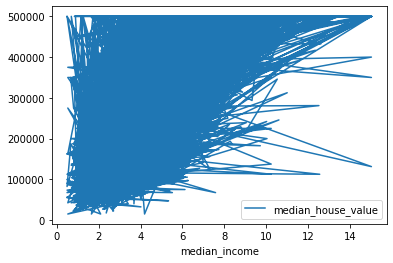

In [9]:
house.plot("median_income", "median_house_value")

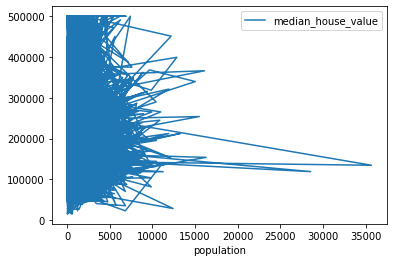

In [11]:
house.plot("population", "median_house_value")

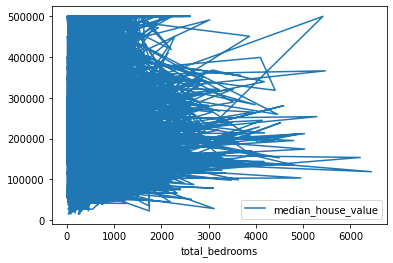

In [12]:
house.plot("total_bedrooms", "median_house_value")

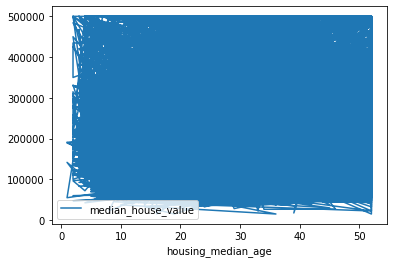

In [10]:
house.plot("housing_median_age", "median_house_value")

In [13]:
x_train, x_test, y_train, y_test = train_test_split(house.median_income, house.median_house_value, test_size = 0.2)

In [14]:
regr = LinearRegression()

In [15]:
regr.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [17]:
predictions = regr.predict(np.array(x_test).reshape(-1,1))

In [18]:
y_test.head()

1090      66300.0
4137     167900.0
17217    320600.0
19824    110300.0
12412    104100.0
Name: median_house_value, dtype: float64

In [19]:
residuals = predictions - y_test

(array([   3.,   39.,   80.,  200.,  545., 1424., 1666.,  162.,    7.,
           2.]), array([-433778.96256129, -356850.28170945, -279921.60085761,
        -202992.92000577, -126064.23915393,  -49135.55830209,
          27793.12254975,  104721.8034016 ,  181650.48425344,
         258579.16510528,  335507.84595712]), <a list of 10 Patch objects>)

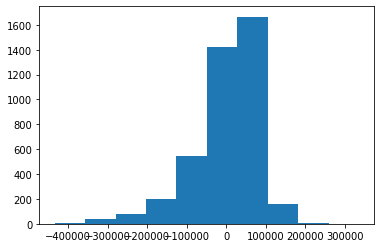

In [20]:
plt.hist(residuals)

In [21]:
mean_squared_error(y_test, predictions) ** 0.5

82623.32552840872